<a href="https://colab.research.google.com/github/Vania-S/astr-19/blob/Final/Final_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

installing sep and astropy

In [ ]:
!pip install astropy sep

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 7.5 MB/s eta 0:00:00


In [ ]:
import numpy as np
import sep

uploading modules for reading the image files and displaying plots
%matplotlib inline allows it show the graph in the notebook

In [ ]:
from astropy.io import fits
import matplotlib.pyplot as plt
from matplotlib import rcParams

%matplotlib inline
rcParams['figure.figsize'] = [10.,8.]

creating the example image, getdata instead of open so that it is read as integers

In [ ]:
data = fits.getdata("image.fits")

Reading the image and makes a gradient of values where the min is the mean - standard deviation and max is the sum

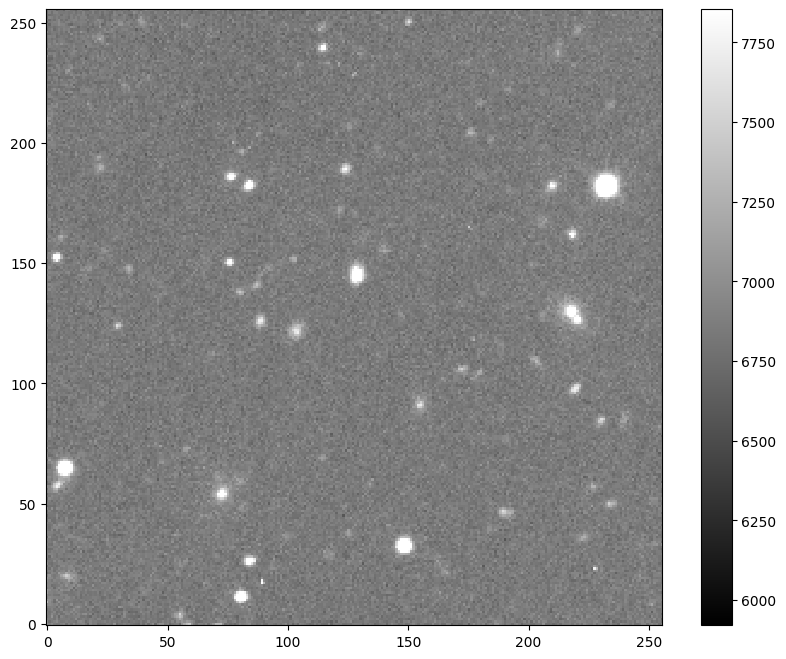

In [ ]:
m, s = np.mean(data), np.std(data)
plt.imshow(data,interpolation = 'nearest', cmap = 'gray', vmin = m-s, vmax = m+s, origin = 'lower')
plt.colorbar();
plt.savefig("Final_1.png",bbox_inches="tight")

In [ ]:
bkg = sep.Background(data)

In [ ]:
bkg = sep.Background(data, bw=64, bh = 64, fw=3, fh=3)

In [ ]:
print(bkg.globalback)
print(bkg.globalrms)

6852.04931640625
65.46174621582031


rms = root mean squared
bkg image is the variation of the global back +- the rms

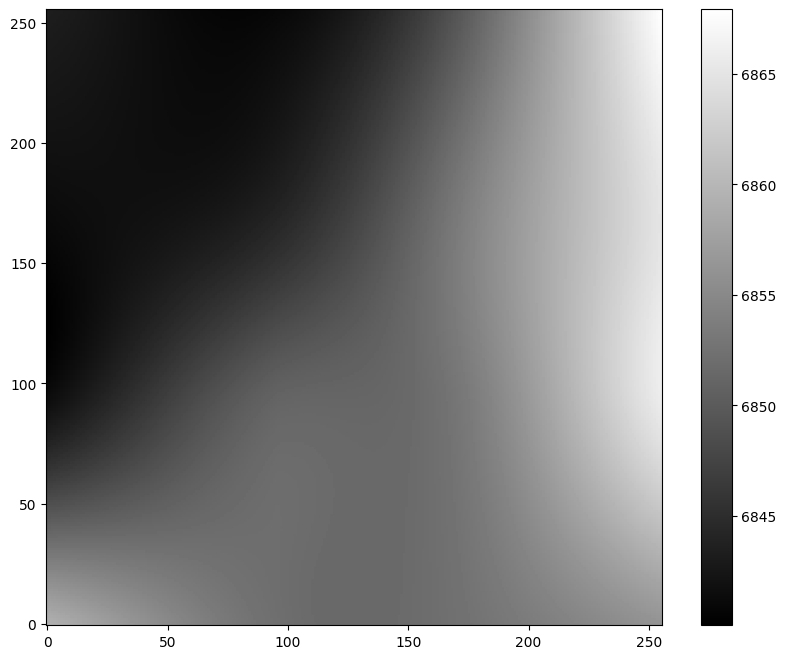

In [ ]:
bkg_image=bkg.back()
plt.imshow(bkg_image,interpolation = 'nearest', cmap= 'gray', origin = 'lower')
plt.colorbar();
plt.savefig("Final_2.png",bbox_inches="tight")

shows the rms as the median value and the quantity of variations from it based on the range of shades from white to gray

In [ ]:
bkg_rms = bkg.rms()

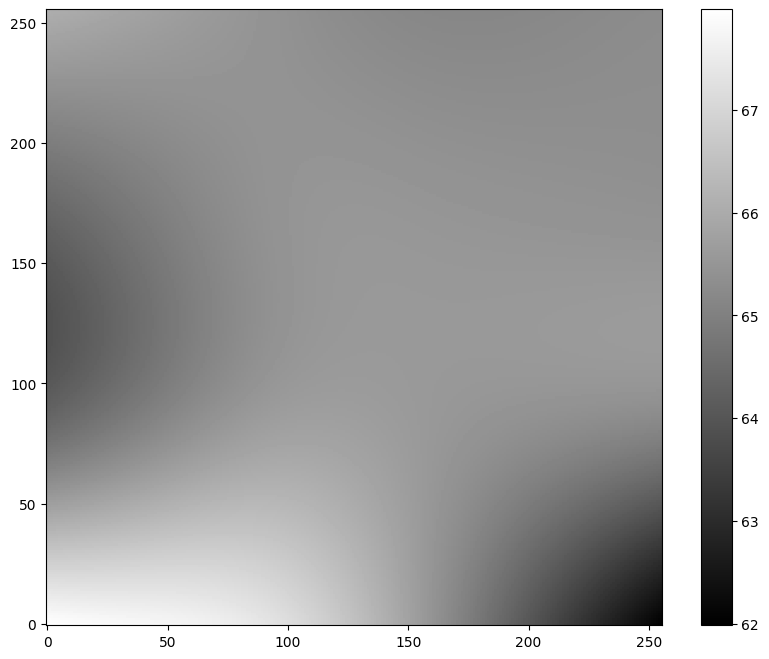

In [ ]:
plt.imshow(bkg_rms,interpolation = 'nearest', cmap = 'gray',origin = 'lower')
plt.colorbar();
plt.savefig("Final_3.png",bbox_inches="tight")

These codes will determine the objects in the picture and highlight them

In [ ]:
data_sub = data - bkg

In [ ]:
objects = sep.extract(data_sub, 1.5, err = bkg.globalrms)

In [ ]:
len(objects)

69

circles each foreign object in red ellipses

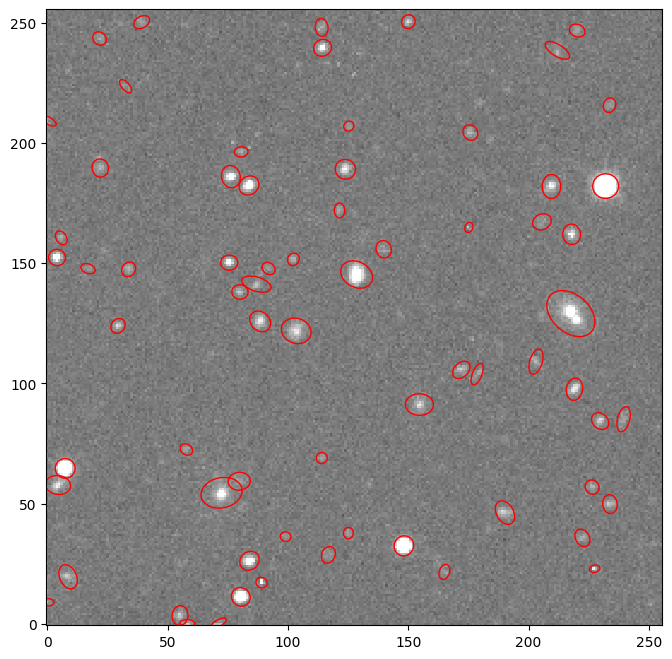

In [ ]:
from matplotlib.patches import Ellipse

fig, ax = plt.subplots()
m,s = np.mean(data_sub), np.std(data_sub)
im =ax.imshow(data_sub,interpolation = 'nearest',cmap= 'gray', vmin = m-s, vmax = m+s, origin ='lower')

for i in range(len(objects)):
  e = Ellipse(xy=(objects['x'][i],objects['y'][i]),width = 6*objects['a'][i], height = 6*objects['b'][i], angle = 6*objects['theta'][i]*180./np.pi)
  e.set_facecolor('none')
  e.set_edgecolor('red')
  ax.add_artist(e)
  plt.savefig("Final_4.png",bbox_inches="tight")

In [ ]:
flux, fluxerr, flag = sep.sum_circle(data_sub,objects['x'], objects['y'],3.0, err= bkg.globalrms, gain= 1.0)

In [ ]:
for i in range(10):
  print("object{:d}:flux = {:f} +/- {:f}".format(i,flux[i],fluxerr[i]))

object0:flux = 2249.159297 +/- 291.027802
object1:flux = 3092.220430 +/- 291.592204
object2:flux = 5949.868379 +/- 356.562003
object3:flux = 1851.426582 +/- 295.028816
object4:flux = 72736.386914 +/- 440.172206
object5:flux = 3860.756152 +/- 352.163162
object6:flux = 6418.913789 +/- 357.458973
object7:flux = 2210.707656 +/- 350.791223
object8:flux = 2741.607227 +/- 352.277746
object9:flux = 20916.875566 +/- 376.966138
